# Partie I

Objectifs :
- Créer un jeu de données ;
- Mettre le texte en minuscule ;
- Suppression de la ponctuation ;
- Séparation en tokens ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot ;
- Suppression des stopwords ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après supression des stopwords ;
- Création d'une version avec stemming du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après le stemming ;
- Création d'une version avec lemmatization du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après la lemmatization ;


## Importations des packages

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Importations des données

Les données sont issue de [cette base de données](https://cs.nyu.edu/~kcho/DMQA/).

Maintenant que nos outils sont chargés, nous allons charger nos données.

Cliquez sur le lien ci-dessous :

https://drive.google.com/drive/folders/12OmusfAUOcoLOCwEc--nfkKQ5eEozU45?usp=sharing

Cliquer droit sur le dossier data et appuyer sur ajouter à mon drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Les données sont maintenant dans votre environnement collab.

In [3]:
import os
print(os.listdir('gdrive/MyDrive/Exercice_1/Partie_1')[:10])

['0a3ff2f0a147c158845afa44d2a012064896566b.story', '0a3fff5779a8f7cfdde5d284a429ab89fd5e85df.story', '0a0f56ebc5a0a67ed18de79d99b40a42d8058d04.story', '0a3ad75d92c5bc2eccf2763df86afe5ddeffed75.story', '0a3f2400ba4e5cdf4b3638ae6fb60fdfa12a2680.story', '0a3f567efff9f0748b2758c9e8c17dc66beade04.story', '0a05b14962b2e73bbff82086762e0e23d32b359f.story', '0a1ad82d161d90d758240407cb8c8fcebff4a212.story', '0a4ec4d37683347ca62b53982d2c5f4efb86f444.story', '0a4b2d4ea5fb0625e3e747525062f0a85345e4df.story']


## Création de la base de données

In [4]:
cmpt = 0
dict_data = dict()

for file_name in os.listdir('gdrive/MyDrive/Exercice_1/Partie_1'):
    #print(file_name)

    # This needs to be done *inside the loop*
    f = open('gdrive/MyDrive/Exercice_1/Partie_1/'+file_name, 'r')
    lst = ""
    for line in f:
       line.strip()
       line = line.replace("\n" ,'')
       line = line.replace("//" , '')
       line = line.replace("/" , '')
       if len(line) > 0 :
          lst += line

    dict_data[cmpt] = lst
    cmpt += 1


In [5]:
len(dict_data)

50

## En minuscule

In [6]:
dict_data_min = dict()
for k, v in dict_data.items():
  dict_data_min[k] = v.lower()

## Tokenization

In [7]:
dict_data_token = dict()
for k, v in dict_data_min.items():
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(v)
  dict_data_token[k] = tokens

## Visualization du vocabulaire

Calcul du vocabulaire des articles.

In [8]:
stats, freq = dict(), dict()

for k, v in dict_data_token.items():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)}

Visualisation du vocabulaire des articles classé par ordre décroissant.

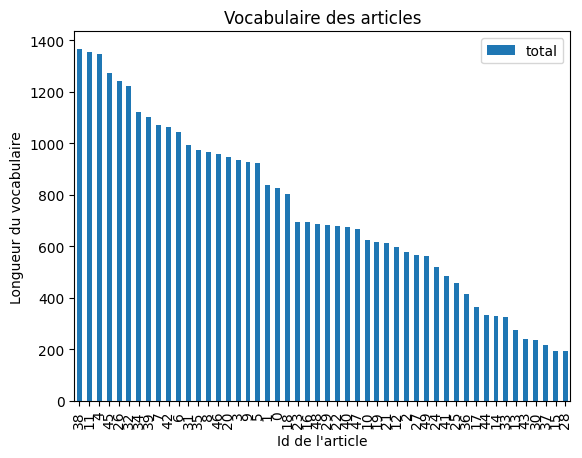

In [9]:
df = pd.DataFrame.from_dict(stats, orient='index')
df = df.sort_values(by='total', ascending=False)

df.plot(kind='bar')
plt.ylabel('Longueur du vocabulaire')
plt.xlabel("Id de l'article")
plt.title('Vocabulaire des articles')
plt.show()

## Les stopwords

Suppression des stopwords.

In [10]:
dict_data_stop = dict()

for k, v in dict_data_token.items():
  dict_data_stop[k] = [w for w in v if not w in list(nltk.corpus.stopwords.words())]

Calcul du vocabulaire des articles.

In [11]:
stats, freq = dict(), dict()

for k, v in dict_data_stop.items():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)}

Visualisation du vocabulaire des articles classé par ordre décroissant après supression des stopwords.

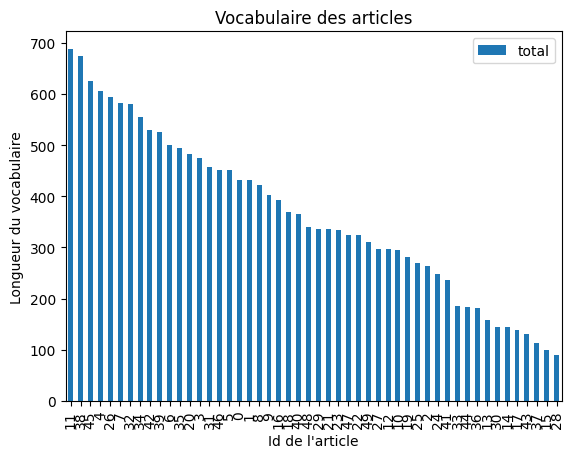

In [12]:
df = pd.DataFrame.from_dict(stats, orient='index')
df = df.sort_values(by='total', ascending=False)

df.plot(kind='bar')
plt.ylabel('Longueur du vocabulaire')
plt.xlabel("Id de l'article")
plt.title('Vocabulaire des articles')
plt.show()

## Stemming

In [13]:
dict_data_stem = dict()
st = LancasterStemmer()

for k, v in dict_data_stop.items():
  dict_data_stem[k] = [st.stem(w) for w in v ]

In [14]:
stats, freq = dict(), dict()

for k, v in dict_data_stem.items():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)}

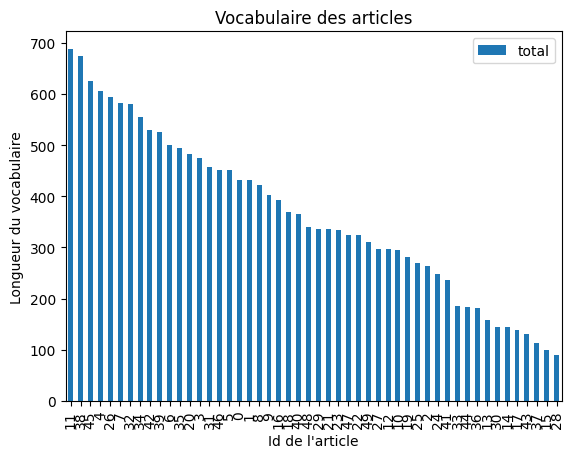

In [15]:
df = pd.DataFrame.from_dict(stats, orient='index')
df = df.sort_values(by='total', ascending=False)

df.plot(kind='bar')
plt.ylabel('Longueur du vocabulaire')
plt.xlabel("Id de l'article")
plt.title('Vocabulaire des articles')
plt.show()

## Lemmatization

In [16]:
dict_data_lem = dict()
word_lemmatizer = WordNetLemmatizer()

for k, v in dict_data_stop.items():
  dict_data_lem[k] = [word_lemmatizer.lemmatize(w) for w in v ]

In [17]:
stats, freq = dict(), dict()

for k, v in dict_data_stem.items():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)}

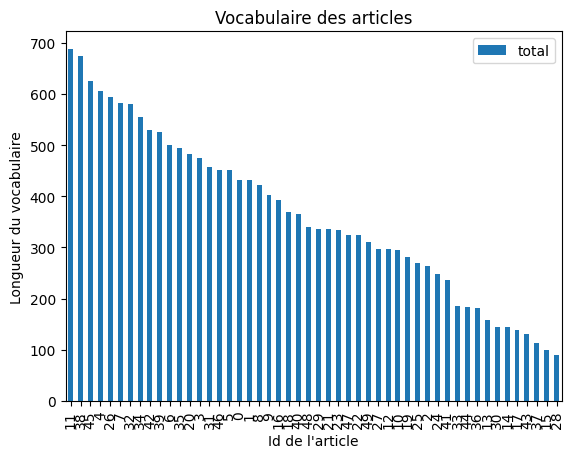

In [18]:
df = pd.DataFrame.from_dict(stats, orient='index')
df = df.sort_values(by='total', ascending=False)

df.plot(kind='bar')
plt.ylabel('Longueur du vocabulaire')
plt.xlabel("Id de l'article")
plt.title('Vocabulaire des articles')
plt.show()

## Exemple d'un texte au cours de la transformation

In [19]:
print("Original : ")
print(dict_data[0][:55])
print("Minuscule : ")
print(dict_data_min[0][:55])
print("Tokenization : ")
print(dict_data_token[0][:5])
print("Stopwords : ")
print(dict_data_stop[0][:5])
print("Stemming : ")
print(dict_data_stem[0][:5])
print("Lemmatization : ")
print(dict_data_lem[0][:5])

Original : 
LOS ANGELES, California (CNN)  -- After about 30 hours 
Minuscule : 
los angeles, california (cnn)  -- after about 30 hours 
Tokenization : 
['los', 'angeles', 'california', 'cnn', 'after']
Stopwords : 
['angeles', 'california', 'cnn', '30', 'hours']
Stemming : 
['angel', 'californ', 'cnn', '30', 'hour']
Lemmatization : 
['angeles', 'california', 'cnn', '30', 'hour']


# Partie II - Détecter le language du texte grâce au stopwords

Les stopwords sont les mots les plus utilisés dans un texte grâce à eux essayé de prédire la langue du texte.

Prédire pour cinq languages :
- Français ;
- Anglais ;
- Espagnol ;
- Italien ;
- Russe.

Vous pourrez trouver de l'aide via ce [lien](https://www.nltk.org/book/ch02.html).


## Importation des données

Les données proviennent de ce [jeux de données](https://zenodo.org/record/841984#.X_Jb2ulKjBI).

In [20]:
x_text = pd.read_csv('gdrive/MyDrive/Exercice_1/Partie_2/x_text.csv')
y_text = pd.read_csv('gdrive/MyDrive/Exercice_1/Partie_2/y_text.csv')
print(x_text.shape)
print(y_text.shape)

(2500, 1)
(2500, 1)


In [21]:
x_text.head()

,text
0,16 апреля 2009 года в Шатойском районе произош...
1,La ciudad de San Cristóbal es sede del Hospita...
2,Les supporters de l'ASM Clermont Auvergne ont ...
3,Anton (or Antonius) Maria Schyrleus (also Schy...
4,"Ralph Staub est un réalisateur, producteur, sc..."


In [22]:
lang = np.unique(y_text)
print(lang)

['english' 'french' 'italian' 'russian' 'spanish']


## Les stopwords

Vous pouvez voir ci-dessous les différentes langues pour lesquels nltk à des stopwords.

In [23]:
nltk.corpus.stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

Visualisation des stopwords pour quelques unes des langues.

In [24]:
nltk.corpus.stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [25]:
nltk.corpus.stopwords.words('norwegian')[:10]

['og', 'i', 'jeg', 'det', 'at', 'en', 'et', 'den', 'til', 'er']

In [26]:
nltk.corpus.stopwords.words('tajik')[:10]

['аз', 'дар', 'ба', 'бо', 'барои', 'бе', 'то', 'ҷуз', 'пеши', 'назди']

In [27]:
nltk.corpus.stopwords.words('arabic')[:10]

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']

## Comparaison des mots

In [28]:
y_pred = list()

for line in x_text.iterrows() :
  language_ratios = {}

  tokenizer = nltk.RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(line[1]['text'])
  test_words = [word.lower() for word in tokens]
  test_words_set = set(test_words)

  for language in lang:
    stopwords_set = set(nltk.corpus.stopwords.words(language))
    common_elements = test_words_set.intersection(stopwords_set)
    language_ratios[language] = len(common_elements)

  y_pred.append(lang[np.argmax(np.fromiter(language_ratios.values(), dtype=float))])

In [29]:
accuracy = 0
for y_1, y_2 in zip(y_pred, y_text['label']) :

  if y_1 == y_2 :
    accuracy += 1
accuracy /= len(y_pred)
print(accuracy*100)

98.04
